In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st


In [2]:
#Importing of the csv file of cleaned data and read it

csv_path = 'Resources/Cleaned_Data_Consumer_Complaints.csv'

consumer_data = pd.read_csv(csv_path)



In [3]:
consumer_data.head(100)

,Complaint ID,Date received,Product,Sub-product,Issue,Company public response,Company,State,ZIP code,Consumer consent provided?,Submitted via,Date sent to company,Timely response?,Consumer disputed?,Company response to consumer
0,3481392,12/31/2019,Mortgage,VA mortgage,Struggling to pay mortgage,No,"PENNYMAC LOAN SERVICES, LLC.",TX,78250,Consent provided,Web,12/31/2019,Yes,Unknown,Closed with non-monetary relief
1,3479162,12/28/2019,Mortgage,VA mortgage,Trouble during payment process,No,JPMORGAN CHASE & CO.,TX,75023,Consent provided,Web,12/28/2019,Yes,Unknown,Closed with explanation
2,3478150,12/27/2019,Mortgage,FHA mortgage,Trouble during payment process,No,Mr. Cooper Group Inc.,TX,78754,Consent provided,Web,12/27/2019,Yes,Unknown,Closed with explanation
3,3478892,12/27/2019,Mortgage,Conventional home mortgage,Trouble during payment process,Yes,Specialized Loan Servicing Holdings LLC,TX,76001,Consent provided,Web,12/27/2019,Yes,Unknown,Closed with explanation
4,3478257,12/26/2019,Mortgage,FHA mortgage,Trouble during payment process,Yes,"Flagstar Bank, N.A.",TX,75068,Consent provided,Web,12/26/2019,Yes,Unknown,Closed with explanation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,3443972,11/20/2019,Mortgage,Conventional home mortgage,Applying for a mortgage or refinancing an exis...,No,TAYLOR MORRISON HOME FUNDING,TX,75082,Consent provided,Web,11/20/2019,Yes,Unknown,Closed with explanation
96,3444985,11/20/2019,Mortgage,FHA mortgage,Struggling to pay mortgage,Yes,WELLS FARGO & COMPANY,TX,78664,Consent provided,Web,11/20/2019,Yes,Unknown,Closed with explanation
97,3444798,11/20/2019,Mortgage,VA mortgage,Trouble during payment process,Yes,Freedom Mortgage Company,TX,77375,Consent provided,Web,11/20/2019,Yes,Unknown,Closed with explanation
98,3446430,11/20/2019,Mortgage,Conventional home mortgage,Struggling to pay mortgage,No,"Community Loan Servicing, LLC (formerly known ...",TX,75070,Unknown,Referral,11/21/2019,Yes,Unknown,Closed with explanation


In [4]:
# See how many different types of company responses there are

consumer_data['Company response to consumer'].value_counts()

Closed with explanation            6047
Closed with non-monetary relief     347
Closed with monetary relief         294
Closed without relief               158
Closed                               87
Closed with relief                   18
Untimely response                    15
Name: Company response to consumer, dtype: int64

In [5]:
# Seeing how many different companies there are and how many times they showed up

consumer_data['Company'].value_counts()

WELLS FARGO & COMPANY                    833
BANK OF AMERICA, NATIONAL ASSOCIATION    795
Ocwen Financial Corporation              741
NATIONSTAR MORTGAGE LLC                  554
JPMORGAN CHASE & CO.                     381
                                        ... 
COMMERCE BANK                              1
FEARON FINANCIAL LLC                       1
Southern Star Capital, L.L.C.              1
Landmark Mortgage LLC                      1
JLM R.E. INVESTMENTS                       1
Name: Company, Length: 301, dtype: int64

In [6]:
# Create a variable to hold value counts of total responses per company will result same value as above
total_closed = consumer_data['Company'].value_counts()


In [7]:
# Added column to data frame to include the amount of TOTAL responses per company
consumer_data["Total Closed Responses"] = consumer_data['Company'].map(total_closed)
consumer_data

,Complaint ID,Date received,Product,Sub-product,Issue,Company public response,Company,State,ZIP code,Consumer consent provided?,Submitted via,Date sent to company,Timely response?,Consumer disputed?,Company response to consumer,Total Closed Responses
0,3481392,12/31/2019,Mortgage,VA mortgage,Struggling to pay mortgage,No,"PENNYMAC LOAN SERVICES, LLC.",TX,78250,Consent provided,Web,12/31/2019,Yes,Unknown,Closed with non-monetary relief,93
1,3479162,12/28/2019,Mortgage,VA mortgage,Trouble during payment process,No,JPMORGAN CHASE & CO.,TX,75023,Consent provided,Web,12/28/2019,Yes,Unknown,Closed with explanation,381
2,3478150,12/27/2019,Mortgage,FHA mortgage,Trouble during payment process,No,Mr. Cooper Group Inc.,TX,78754,Consent provided,Web,12/27/2019,Yes,Unknown,Closed with explanation,78
3,3478892,12/27/2019,Mortgage,Conventional home mortgage,Trouble during payment process,Yes,Specialized Loan Servicing Holdings LLC,TX,76001,Consent provided,Web,12/27/2019,Yes,Unknown,Closed with explanation,108
4,3478257,12/26/2019,Mortgage,FHA mortgage,Trouble during payment process,Yes,"Flagstar Bank, N.A.",TX,75068,Consent provided,Web,12/26/2019,Yes,Unknown,Closed with explanation,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6961,4128,12/8/2011,Mortgage,Conventional fixed mortgage,"Loan servicing, payments, escrow account",No,JPMORGAN CHASE & CO.,TX,77041,Unknown,Web,12/11/2011,Yes,No,Closed with relief,381
6962,4095,12/8/2011,Mortgage,Conventional fixed mortgage,"Loan servicing, payments, escrow account",No,WELLS FARGO & COMPANY,TX,75022,Unknown,Web,12/12/2011,Yes,No,Closed without relief,833
6963,4139,12/8/2011,Mortgage,Conventional fixed mortgage,"Loan modification,collection,foreclosure",No,"CITIBANK, N.A.",TX,78753,Unknown,Web,12/12/2011,Yes,No,Closed without relief,191
6964,3218,12/6/2011,Mortgage,Conventional adjustable mortgage (ARM),"Loan modification,collection,foreclosure",No,"BANK OF AMERICA, NATIONAL ASSOCIATION",TX,75006,Unknown,Web,12/8/2011,Yes,No,Closed without relief,795


In [8]:
# New Grouped variable for total responses and .groupby for company and total closed responses
grouped_total = consumer_data.groupby('Company')['Total Closed Responses'].max()
grouped_total

Company
1ST ALLIANCE LENDING, LLC        1
1ST PREFERENCE MORTGAGE CORP     1
21ST MORTGAGE CORP.             12
360 MORTGAGE GROUP LLC           3
ACRE MORTGAGE                    1
                                ..
WSFS FINANCIAL CORPORATION       1
Williston Financial Group        1
ZIONS BANCORPORATION             8
Zeus Mortgage, Ltd.              1
iFreedom Direct Corporation      1
Name: Total Closed Responses, Length: 301, dtype: int64

In [9]:
#Created DataFrame for visualization and to create bar graph later 
grouped_total_df = pd.DataFrame(grouped_total)
grouped_total_df

,Total Closed Responses
Company,
"1ST ALLIANCE LENDING, LLC",1
1ST PREFERENCE MORTGAGE CORP,1
21ST MORTGAGE CORP.,12
360 MORTGAGE GROUP LLC,3
ACRE MORTGAGE,1
...,...
WSFS FINANCIAL CORPORATION,1
Williston Financial Group,1
ZIONS BANCORPORATION,8


In [10]:
#This does not need to be inckuded just same dataframe from above in descending order
grouped_total_df.sort_values(by=['Total Closed Responses'], ascending=False)

,Total Closed Responses
Company,
WELLS FARGO & COMPANY,833
"BANK OF AMERICA, NATIONAL ASSOCIATION",795
Ocwen Financial Corporation,741
NATIONSTAR MORTGAGE LLC,554
JPMORGAN CHASE & CO.,381
...,...
MARQUEE MORTGAGE,1
"MB FINANCIAL, INC.",1
1ST PREFERENCE MORTGAGE CORP,1


In [11]:
#Final dataframe of the total closed responses for the Top 3 Companies
final_grouped_df = grouped_total_df.loc[grouped_total_df['Total Closed Responses']>600]
final_grouped_df = pd.DataFrame(final_grouped_df)
final_grouped_df

,Total Closed Responses
Company,
"BANK OF AMERICA, NATIONAL ASSOCIATION",795
Ocwen Financial Corporation,741
WELLS FARGO & COMPANY,833


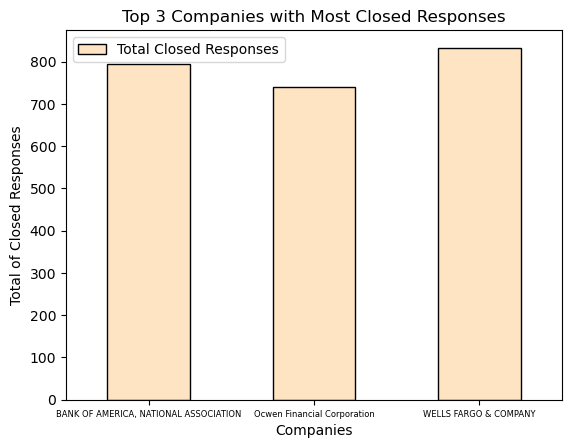

In [12]:
# Graph for Top 3 Companies *in accordance with question we chose to answer*
final_grouped_df.plot.bar(color='bisque',edgecolor='black')
plt.title('Top 3 Companies with Most Closed Responses')
plt.xticks(rotation=0, horizontalalignment="center", fontsize=6)
plt.xlabel('Companies')
plt.ylabel('Total of Closed Responses')
plt.savefig('Images/final_grouped.png')

In [13]:
#Grouped companies with company response to count how many of each responses a certain company had

company_grouped_response = consumer_data.groupby('Company')['Company response to consumer'].value_counts()
company_grouped_response

Company                       Company response to consumer   
1ST ALLIANCE LENDING, LLC     Closed with explanation             1
1ST PREFERENCE MORTGAGE CORP  Closed with explanation             1
21ST MORTGAGE CORP.           Closed with explanation            11
                              Closed with non-monetary relief     1
360 MORTGAGE GROUP LLC        Closed with explanation             3
                                                                 ..
WSFS FINANCIAL CORPORATION    Closed with explanation             1
Williston Financial Group     Closed with explanation             1
ZIONS BANCORPORATION          Closed with explanation             8
Zeus Mortgage, Ltd.           Closed with explanation             1
iFreedom Direct Corporation   Closed with explanation             1
Name: Company response to consumer, Length: 459, dtype: int64

In [14]:
#Created a Data Frame for the new grouped data set 

company_grouped_df = pd.DataFrame(company_grouped_response)
company_grouped_df = company_grouped_df.rename(columns= {"Company response to consumer": "# of Responses Per Company"})

In [15]:
# Set data frame in descending order 
company_grouped_df.sort_values(by=['# of Responses Per Company'], ascending=False)

,,# of Responses Per Company
Company,Company response to consumer,
WELLS FARGO & COMPANY,Closed with explanation,692
Ocwen Financial Corporation,Closed with explanation,681
"BANK OF AMERICA, NATIONAL ASSOCIATION",Closed with explanation,556
NATIONSTAR MORTGAGE LLC,Closed with explanation,538
JPMORGAN CHASE & CO.,Closed with explanation,310
...,...,...
MARQUEE MORTGAGE,Untimely response,1
"MB FINANCIAL, INC.",Closed with explanation,1
MCI Mortgage Inc,Closed with explanation,1


In [16]:
#This is to show the amount of responses closed with EXPLANATION per company top 3
complaints_df = consumer_data.groupby('Company response to consumer')['Company']
explanation_df = complaints_df.get_group('Closed with explanation').value_counts()
explanation_df = pd.DataFrame(explanation_df)
explanation_df = explanation_df.rename(columns= {"Company": "Total of Explanation Responses"})
exp_top_df = explanation_df.loc[explanation_df['Total of Explanation Responses']>550]
exp_top_df = pd.DataFrame(exp_top_df)
exp_top_df

,Total of Explanation Responses
WELLS FARGO & COMPANY,692
Ocwen Financial Corporation,681
"BANK OF AMERICA, NATIONAL ASSOCIATION",556


In [17]:
#This is to show the amount of responses closed with NON-MONETARY RELIEF top 3
non_monetary_df = complaints_df.get_group('Closed with non-monetary relief').value_counts()
non_monetary_df = pd.DataFrame(non_monetary_df)
non_monetary_df = non_monetary_df.rename(columns= {"Company": "Total of Non-Monetary Responses"})
non_monetary_top_df = non_monetary_df.loc[non_monetary_df['Total of Non-Monetary Responses']>20]
non_monetary_top_df = pd.DataFrame(non_monetary_top_df)
non_monetary_top_df

,Total of Non-Monetary Responses
"BANK OF AMERICA, NATIONAL ASSOCIATION",113
WELLS FARGO & COMPANY,67
Ditech Financial LLC,28


In [18]:
#This is to show the amount of responses closed with MONETARY RELIEF top 3
monetary_df = complaints_df.get_group('Closed with monetary relief').value_counts()
monetary_df = pd.DataFrame(monetary_df)
monetary_df = monetary_df.rename(columns= {"Company": "Total of Monetary Responses"})
monetary_top_df = monetary_df.loc[monetary_df['Total of Monetary Responses']>40]
monetary_top_df = pd.DataFrame(monetary_top_df)
monetary_top_df

,Total of Monetary Responses
"BANK OF AMERICA, NATIONAL ASSOCIATION",46
WELLS FARGO & COMPANY,42
JPMORGAN CHASE & CO.,42


In [19]:
#This is to show the amount of responses Closed without relief top 3
no_relief_df = complaints_df.get_group('Closed without relief').value_counts()
no_relief_df = pd.DataFrame(no_relief_df)
no_relief_df = no_relief_df.rename(columns= {"Company": "Total of No Relief Responses"})
no_relief_top_df = no_relief_df.loc[no_relief_df['Total of No Relief Responses']>15]
no_relief_top_df = pd.DataFrame(no_relief_top_df)
no_relief_top_df

,Total of No Relief Responses
"BANK OF AMERICA, NATIONAL ASSOCIATION",68
WELLS FARGO & COMPANY,32
Ocwen Financial Corporation,18


In [20]:
#This is to show the amount of responses Closed top 3
closed_df = complaints_df.get_group('Closed').value_counts()
closed_df = pd.DataFrame(closed_df)
closed_df = closed_df.rename(columns= {"Company": "Total of Closed Responses"})
closedtop3_df = closed_df.loc[closed_df['Total of Closed Responses'] >= 7]
closedtop3_df = pd.DataFrame(closedtop3_df)
closedtop3_df

,Total of Closed Responses
Ocwen Financial Corporation,24
"BANK OF AMERICA, NATIONAL ASSOCIATION",9
Specialized Loan Servicing Holdings LLC,7
PNC Bank N.A.,7


In [21]:
#This is to show the amount of responses Closed with relief top 3
with_relief_df = complaints_df.get_group('Closed with relief').value_counts()
with_relief_df = pd.DataFrame(with_relief_df)
with_relief_df = with_relief_df.rename(columns= {"Company": "Total of Relief Responses"})
relief_top_df = with_relief_df.loc[with_relief_df['Total of Relief Responses']>=3]
relief_top_df = pd.DataFrame(relief_top_df)
relief_top_df

,Total of Relief Responses
Ocwen Financial Corporation,4
"CITIBANK, N.A.",3
M&T BANK CORPORATION,3


In [22]:
#This is to show the amount of Untimely responses top 3
untimely_df = complaints_df.get_group('Untimely response').value_counts()
untimely_df = pd.DataFrame(untimely_df)
untimely_df = untimely_df.rename(columns= {"Company": "Total of Untimely Responses"})
untimely_df.head(10)

,Total of Untimely Responses
PROPEL FINANCIAL SERVICES LLC,3
"SW Linear Investment Group, LLC",1
Mortgage Banking Associates Inc,1
ASPIRE FINANCIAL INC.,1
Global Home Finance Inc,1
"REPUBLIC MORTGAGE HOME LOANS, LLC",1
"Civic Financial Services, Inc.",1
FIRST MORTGAGE CORPORATION,1
MARQUEE MORTGAGE,1
Prudent Law Group,1


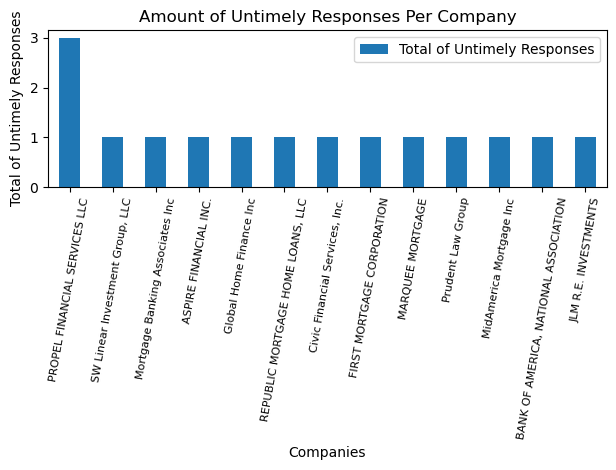

In [23]:
#Will not include this graph since its unlegible because of to many x values 
untimely_df.plot.bar()
plt.title('Amount of Untimely Responses Per Company')
plt.xticks(rotation=80, horizontalalignment="center", fontsize=8)
plt.xlabel('Companies')
plt.ylabel('Total of Untimely Responses')
plt.tight_layout()
#plt.savefig('Images/untimely.png')

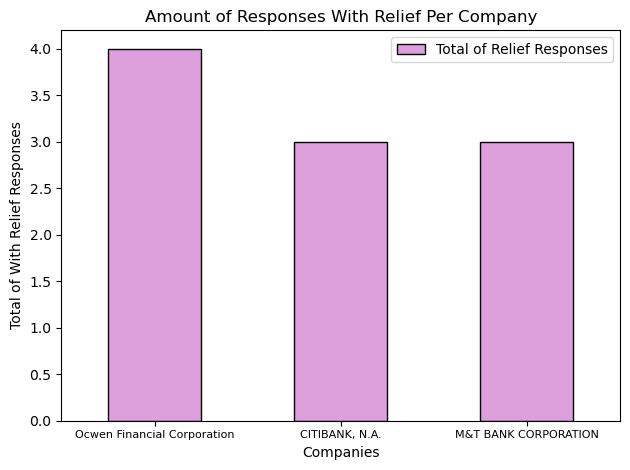

In [24]:
# Will include this graph if theres time for explanation. *Bonus Graph to include in slides*
relief_top_df.plot.bar(color='plum',edgecolor='black')
plt.title('Amount of Responses With Relief Per Company')
plt.xticks(rotation=0, horizontalalignment="center", fontsize=8)
plt.xlabel('Companies')
plt.ylabel('Total of With Relief Responses')
plt.tight_layout()
plt.savefig('Images/with_relief.png')

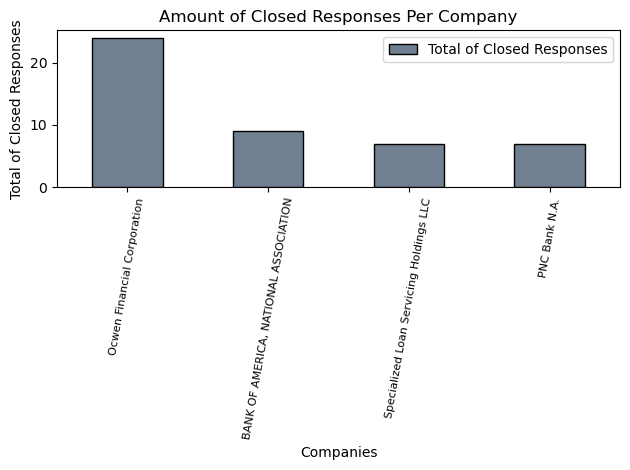

In [25]:
#Will not include this graph since theres not really an explanation on what just a "Closed response" is from a company
closedtop3_df.plot.bar(color='slategray',edgecolor='black')
plt.title('Amount of Closed Responses Per Company')
plt.xticks(rotation=80, horizontalalignment="center", fontsize=8)
plt.xlabel('Companies')
plt.ylabel('Total of Closed Responses')
plt.tight_layout()
plt.savefig('Images/closed.png')

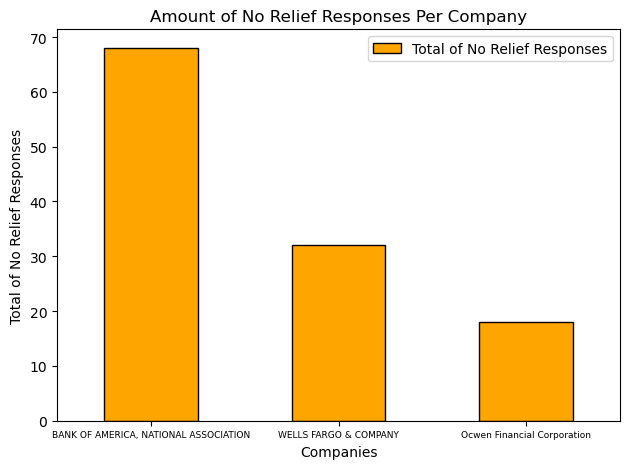

In [26]:
#Also another bonus graph to include in slides if theres enough time
no_relief_top_df.plot.bar(color='orange',edgecolor='black')
plt.title('Amount of No Relief Responses Per Company')
plt.xticks(rotation=0, horizontalalignment="center", fontsize=6.5)
plt.xlabel('Companies')
plt.ylabel('Total of No Relief Responses')
plt.tight_layout()
plt.savefig('Images/no_relief.png')

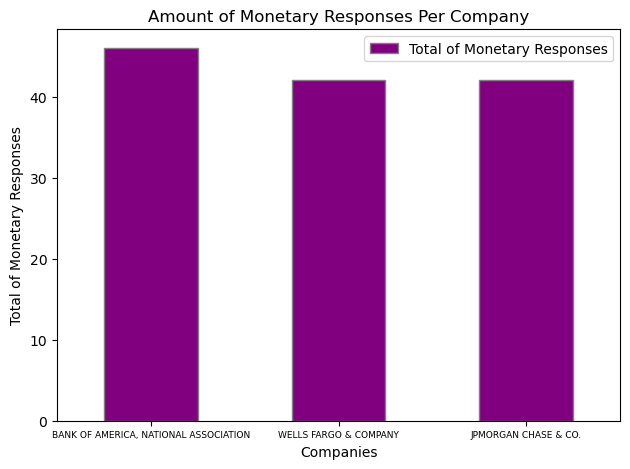

In [27]:
#Will Include this graph in slides since the amount of monetary responses is significant enough to include
monetary_top_df.plot.bar(color='purple',edgecolor='grey')
plt.title('Amount of Monetary Responses Per Company')
plt.xticks(rotation=0, horizontalalignment="center", fontsize=6.5)
plt.xlabel('Companies')
plt.ylabel('Total of Monetary Responses')
plt.tight_layout()
plt.savefig('Images/monetary.png')

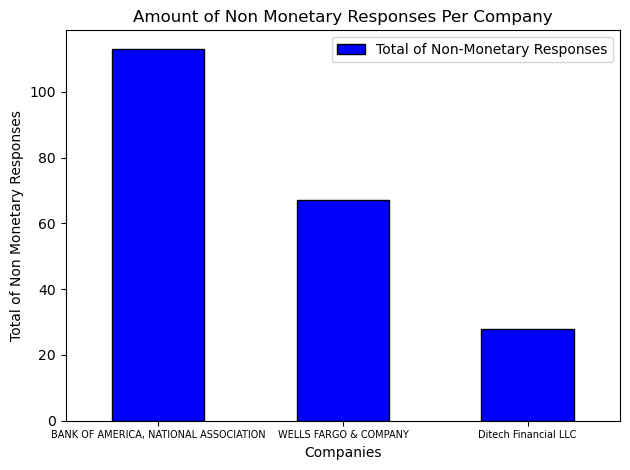

In [28]:
#Will Include this graph in slides since the amount of non monetary responses is significant enough to include

non_monetary_top_df.plot.bar(color='blue',edgecolor='black')
plt.title('Amount of Non Monetary Responses Per Company')
plt.xticks(rotation=0, horizontalalignment="center", fontsize=7)
plt.xlabel('Companies')
plt.ylabel('Total of Non Monetary Responses')
plt.tight_layout()
plt.savefig('Images/non_monetary.png')

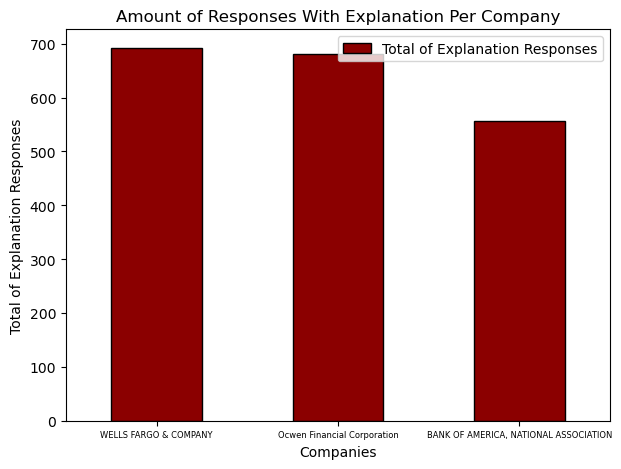

In [29]:
exp_top_df.plot.bar(color='darkred',edgecolor='black')
plt.title('Amount of Responses With Explanation Per Company')
plt.xticks(rotation=0, horizontalalignment="center", fontsize=6)
plt.xlabel('Companies')
plt.ylabel('Total of Explanation Responses')
plt.tight_layout()
plt.savefig('Images/explanation.png')